# Data Outages and Strikes

## Data Outages
Let's see if there are any data outages throughout the four months.  
  
We know that there are no null values in the signal and signal_passing_time columns.

However, we do know that there are some missing values in the other columns, such as the columns relating to planned events. 

Two types of outages:
- Signal Outages
- Event Planning Outages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%store -r train_timings

# we will create an event count dataframe showing planned event metrics for each day.. and also average planned event metrics
# we will do the same for signals
# we will also create a dataframe to hold signal to planned event ratios

# create data for each day
train_timings_datetime_index = train_timings.set_index(['signal_passing_time'])
event_count_daily = pd.DataFrame()
event_count_daily['event_diff_mean'] = train_timings_datetime_index.groupby(pd.Grouper(freq='1D')).mean()['event_diff_seconds']
event_count_daily['event_count'] = train_timings_datetime_index.groupby(pd.Grouper(freq='1D')).count()['planned_event_type']

unique_signals_daily = pd.DataFrame()
unique_signals_daily['signal_count'] = train_timings_datetime_index[['signal']].groupby(pd.Grouper(freq='1D')).aggregate(pd.Series.nunique)
unique_signals_daily['signals_recorded'] = train_timings_datetime_index.groupby(pd.Grouper(freq='1D')).count()['signal']
unique_signals_daily['percent'] = unique_signals_daily['signal_count'].div(343)

signal_to_planned_event_ratio = pd.DataFrame()
signal_to_planned_event_ratio['ratio'] = unique_signals_daily['signal_count'].div(event_count_daily['event_count'])

# add the average data
event_count_daily_mean = pd.DataFrame()
event_count_daily_mean['event_count_day_of_week_mean'] = event_count_daily['event_count'].groupby(event_count_daily.index.day_name()).mean()
event_count_daily['day_of_week'] = event_count_daily.index.day_name()
event_count_daily = event_count_daily.merge(event_count_daily_mean, how='left',left_on='day_of_week', right_index=True)
event_count_daily

unique_signals_daily_mean = pd.DataFrame()
unique_signals_daily_mean['signal_count_day_of_week_mean'] = unique_signals_daily['signal_count'].groupby(unique_signals_daily.index.day_name()).mean()
unique_signals_daily_mean['signals_recorded_day_of_week_mean'] = unique_signals_daily['signals_recorded'].groupby(unique_signals_daily.index.day_name()).mean()
unique_signals_daily['day_of_week'] = event_count_daily.index.day_name()
unique_signals_daily = unique_signals_daily.merge(unique_signals_daily_mean, how='left',left_on='day_of_week', right_index=True)

### Daily Planned Event Metrics

In [2]:
event_count_daily

,event_diff_mean,event_count,day_of_week,event_count_day_of_week_mean
signal_passing_time,,,,
2022-04-01 00:00:00+00:00,-20.740088,8399,Friday,8157.500000
2022-04-02 00:00:00+00:00,-36.036388,7530,Saturday,7516.722222
2022-04-03 00:00:00+00:00,-40.821820,3373,Sunday,4146.222222
2022-04-04 00:00:00+00:00,-25.550758,8176,Monday,7674.117647
2022-04-05 00:00:00+00:00,-37.276544,8288,Tuesday,7814.470588
...,...,...,...,...
2022-07-27 00:00:00+00:00,20.173990,2253,Wednesday,7939.352941
2022-07-28 00:00:00+00:00,-52.023313,7764,Thursday,7875.058824
2022-07-29 00:00:00+00:00,-72.777742,9192,Friday,8157.500000


### Daily Signal Metrics

In [3]:
unique_signals_daily

,signal_count,signals_recorded,percent,day_of_week,signal_count_day_of_week_mean,signals_recorded_day_of_week_mean
signal_passing_time,,,,,,
2022-04-01 00:00:00+00:00,288,24201,0.839650,Friday,284.166667,23395.333333
2022-04-02 00:00:00+00:00,267,19904,0.778426,Saturday,264.055556,20064.833333
2022-04-03 00:00:00+00:00,241,8847,0.702624,Sunday,253.833333,11812.666667
2022-04-04 00:00:00+00:00,284,23404,0.827988,Monday,283.176471,21949.764706
2022-04-05 00:00:00+00:00,286,23604,0.833819,Tuesday,286.764706,22487.000000
...,...,...,...,...,...,...
2022-07-27 00:00:00+00:00,265,6395,0.772595,Wednesday,286.470588,22740.705882
2022-07-28 00:00:00+00:00,287,21699,0.836735,Thursday,284.823529,22533.941176
2022-07-29 00:00:00+00:00,284,26081,0.827988,Friday,284.166667,23395.333333


With this data we can compare
- Daily Active Signal Counts vs Average by Day of Week

This should show us if there are any particular days where the number of active signals were much lower than the average for that day of the week.

- Daily Event Counts vs Average by Day of Week

This should show us if there are any particular days where the number of events planned were much lower than the average number planned for that day of the week.

- Daily Unique Signal Count : Daily Planned Event Count Ratio

This should show us if there were any days where the number of active signals did not correspond to the number of events planned.

In [4]:
# Define some functions to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

def plot_series_double(df=None, column1=None, column2=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column1:
        ax.plot(df[column1][start:end], label=column1)
        ax.set_ylabel(ylabel, fontsize=16)
    if column2:
        ax.plot(df[column2][start:end], label=column2)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    ax.legend(fontsize=16)
    return ax

/Users/ivan/opt/anaconda3/envs/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ivan/opt/anaconda3/envs/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


### Signal Outages

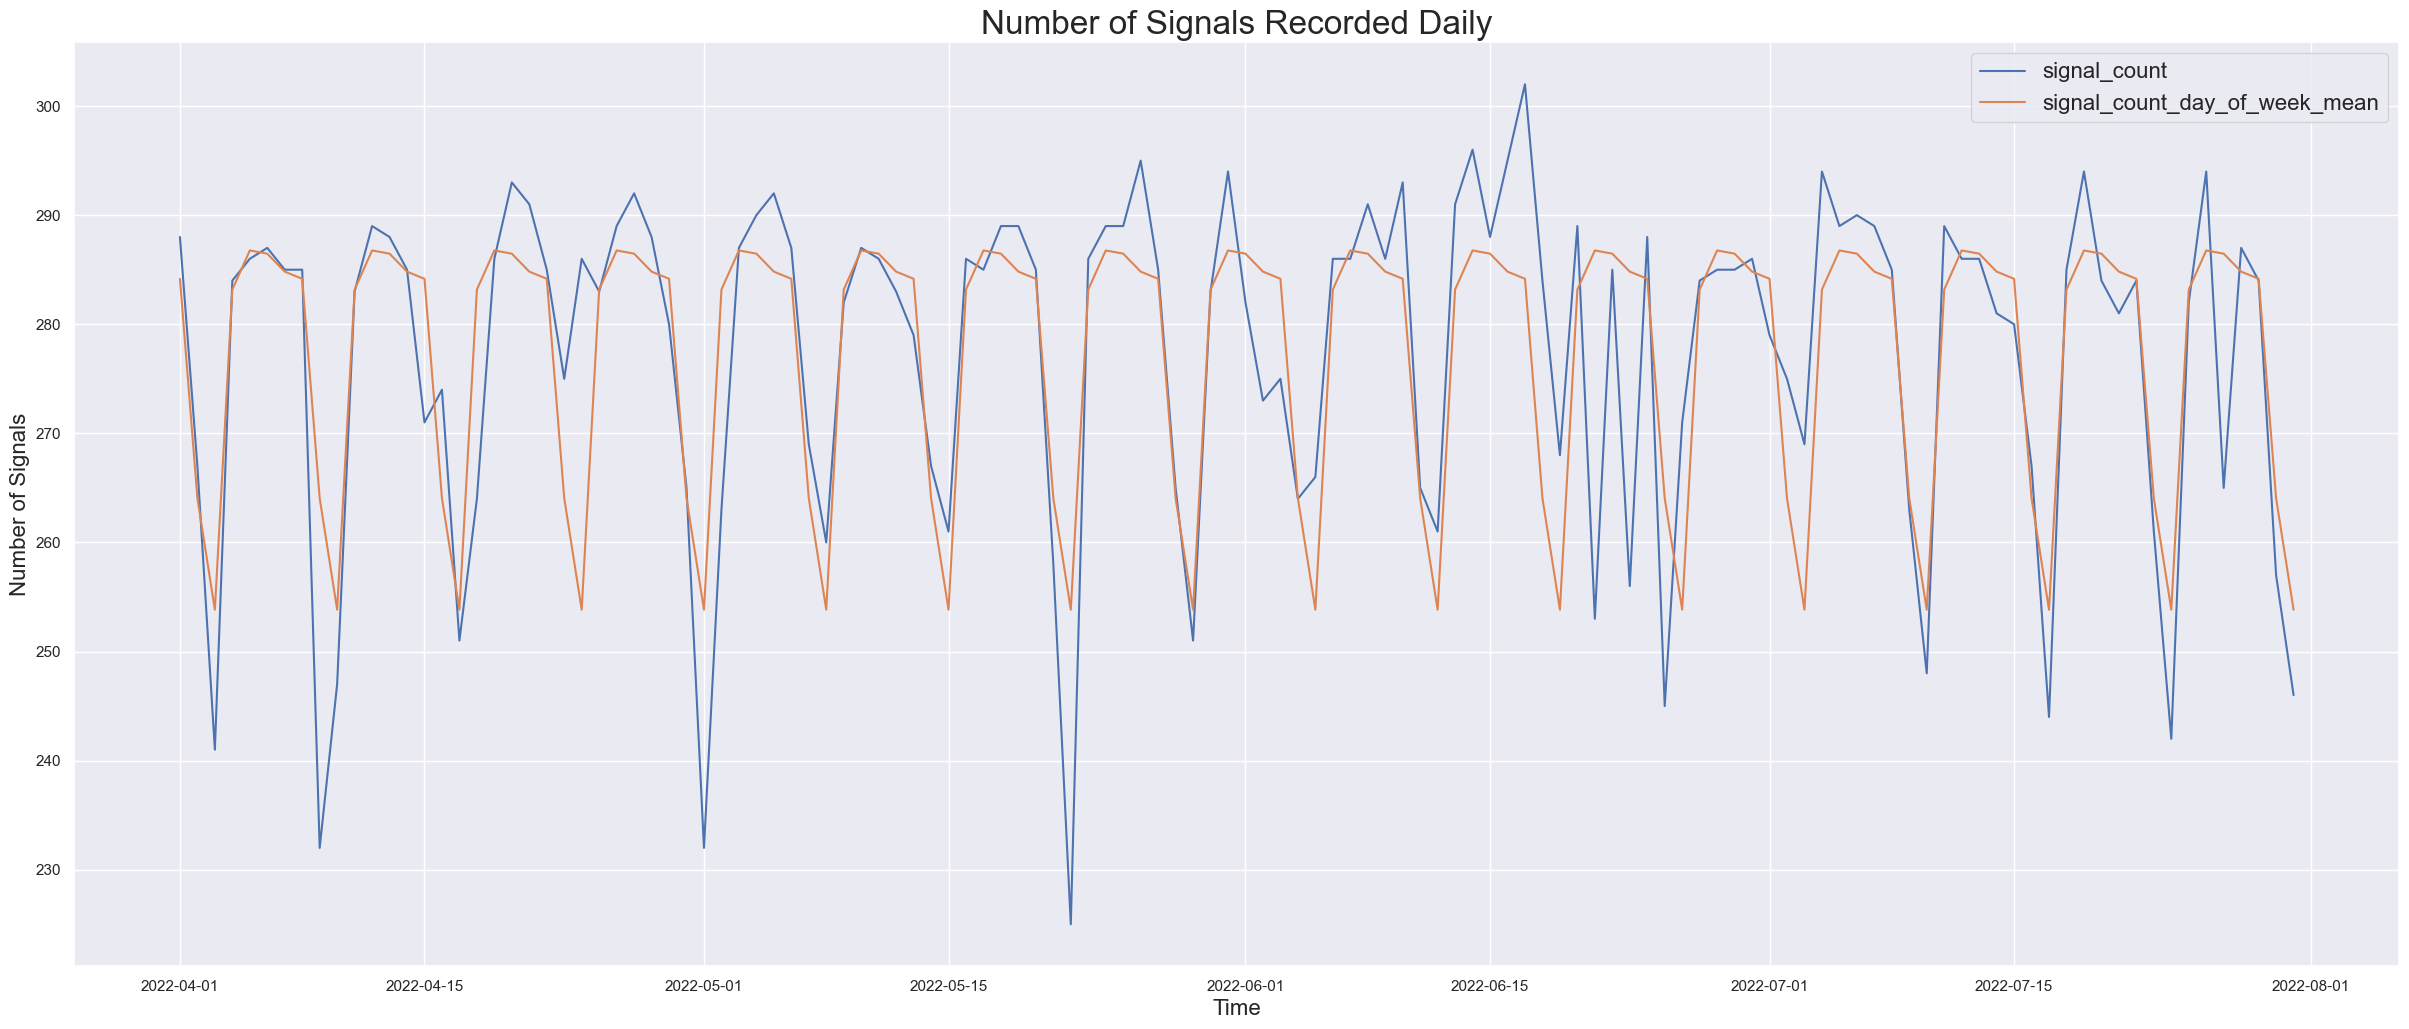

In [5]:
ax = plot_series_double(df=unique_signals_daily, column1='signal_count', column2='signal_count_day_of_week_mean', ylabel='Number of Signals',
                 title='Number of Signals Recorded Daily', end=24*7*2, )
plt.show()

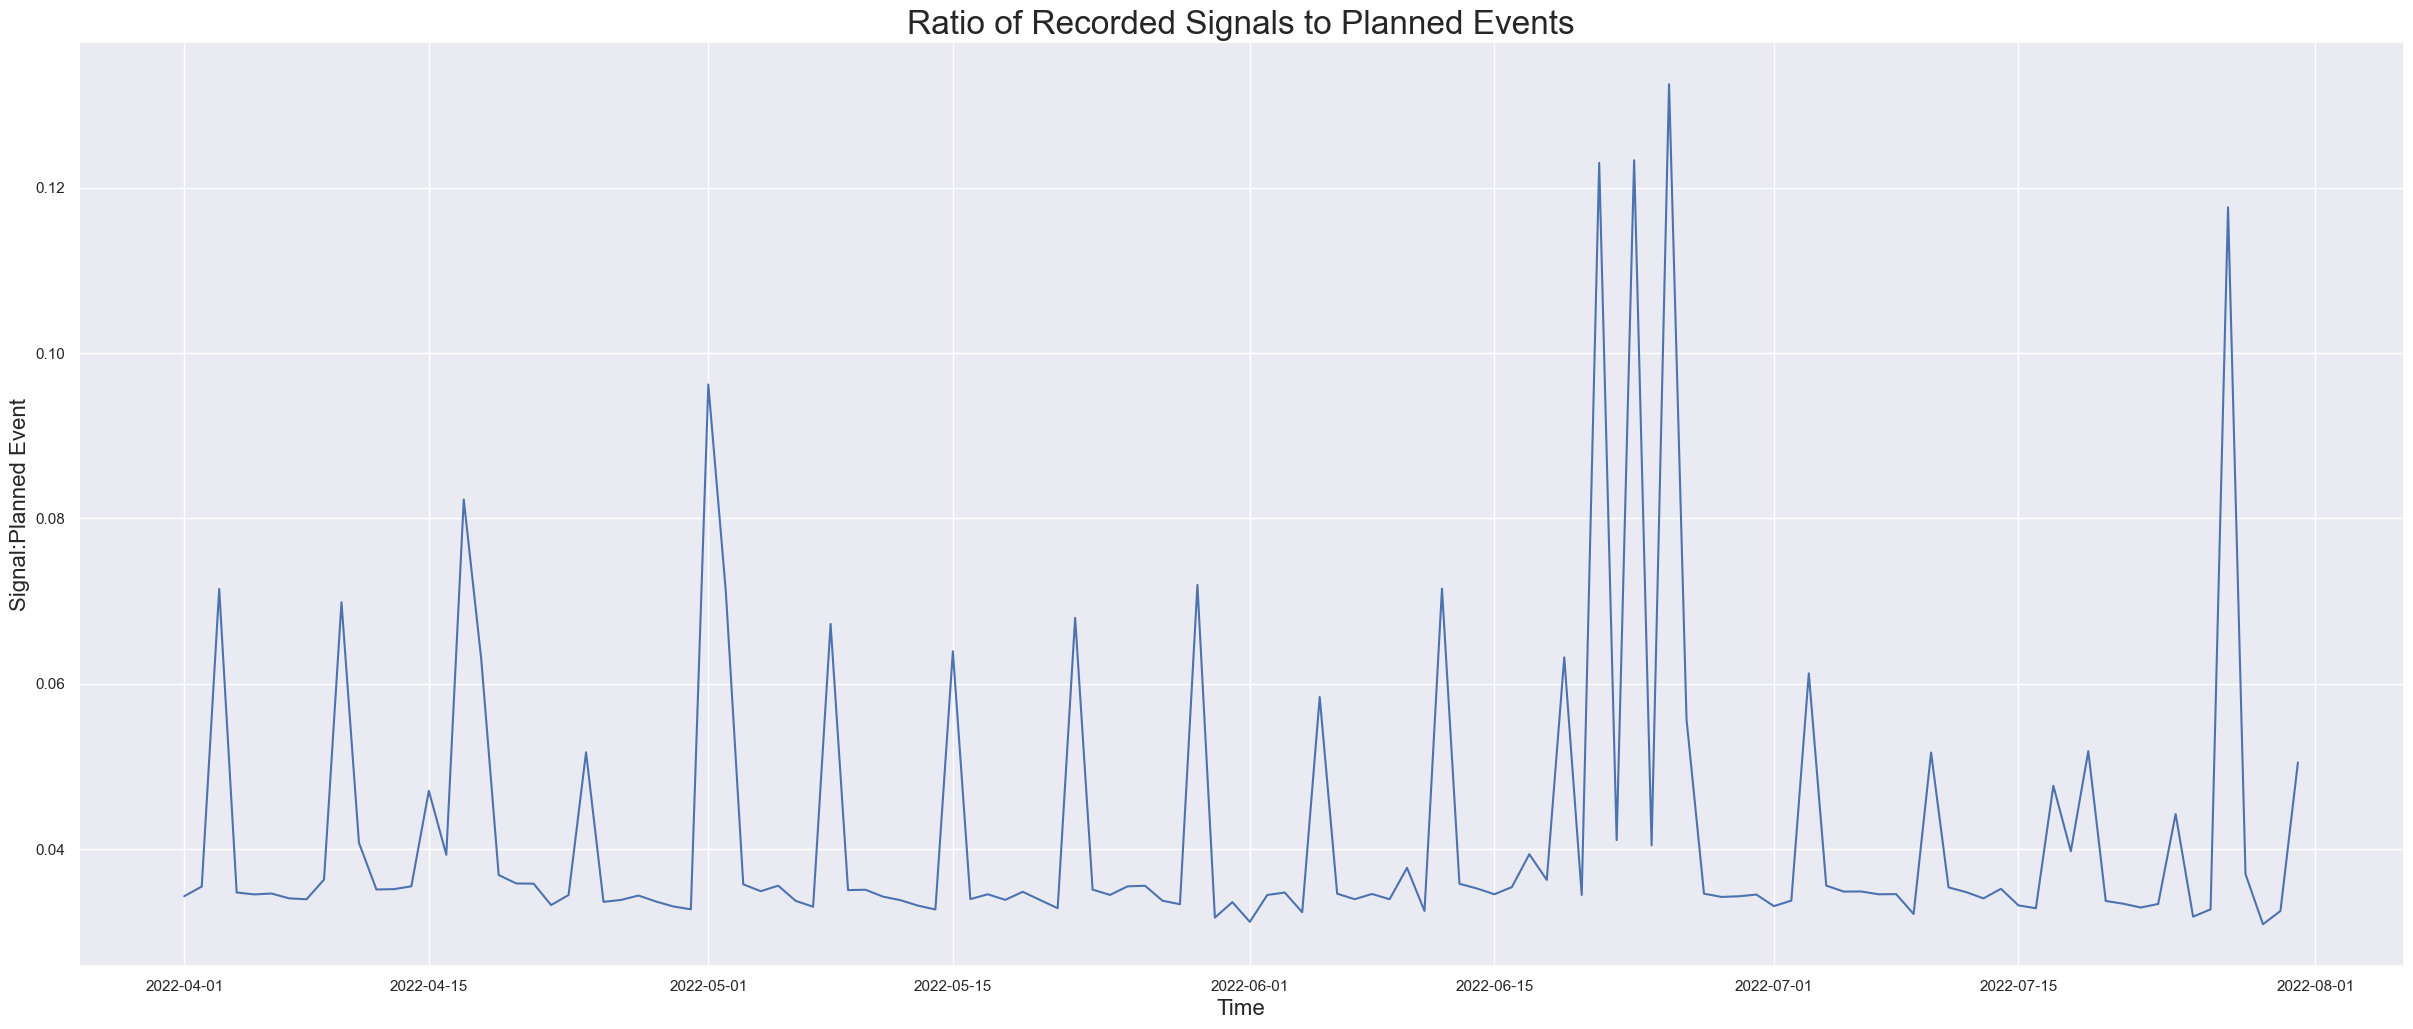

In [6]:
ax = plot_series(df=signal_to_planned_event_ratio, column='ratio', ylabel='Signal:Planned Event',
                 title='Ratio of Recorded Signals to Planned Events', end=24*7*2)

plt.show()

The most obvious takeaway from the Number of Signals recorded daily is that there are always far fewer recorded signals on a Sunday on average.

However, there does seem to be much lower numbers of recordings on 7th/8th April, 1st May and the 22nd/23rd May.  
One other recording worth noting would be midweek around the 22nd of July.

When we line this up with the ratio of recorded signals to planned events, we can see that this number does seem to spike weekly on Sundays.

The spike on the 1st of May could be because the number of planned events was much lower, because of the May Day bank holiday.  
However, it still stands out and could possibly indicate scheduled maintenance intentionally timed to avoid disruption.

The other most considerable spike in the Ratio of recorded signals to planned events is midweek around the 22nd of July.
This is much more likely to be an unplanned signal outage as it is midweek.

We can also see the outlying values in the week of the 20th of June which are related to the [Strikes](#strikes)

### Planned Event Outages

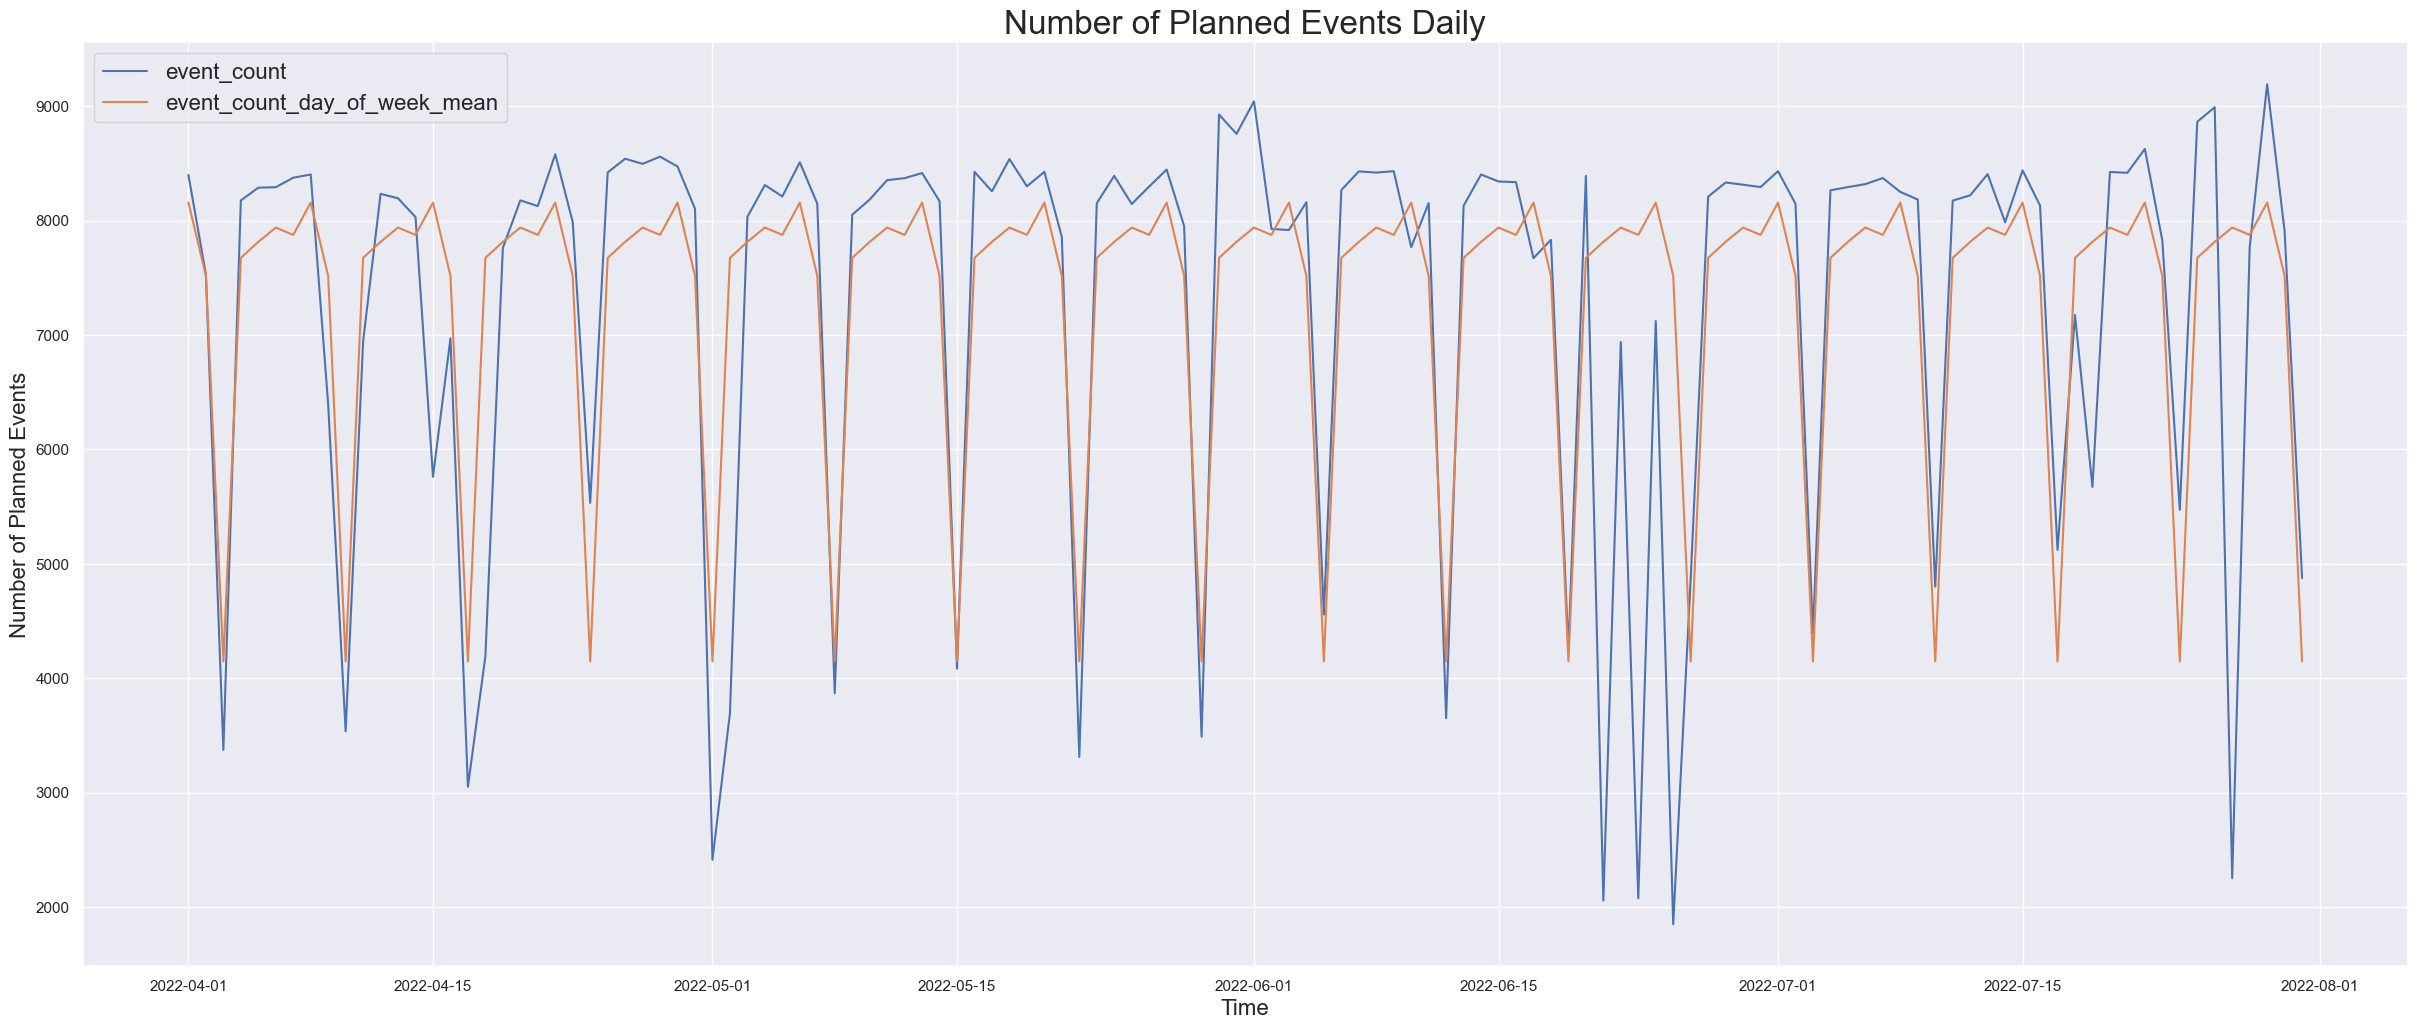

In [7]:
ax = plot_series_double(df=event_count_daily, column1='event_count', column2='event_count_day_of_week_mean', ylabel='Number of Planned Events',
                 title='Number of Planned Events Daily', end=24*7*2, )

There doesn't seem to be many significant decreases in the number of planned events.
On the 1st of  May there is a lower drop which does indicate that this was likely to facilitate planned maintenance.  

However, there does seem to be a drop in planned events midweek on the 22nd of July. If the signal outages identified earlier were unplanned, the planned events would remain normal.

This indicates that there must have been scheduled signal outages midweek on the 22nd of July also.

## Strikes

Strike dates were announced for 21st, 23rd and 25th June by Network Rail.

In [8]:
# we will isolate the strike event data, and merge it with our averages so that it can be compared easily
# we will drop duplicate columns and columns that are not relevant

# get the strike data
strike_event_count_daily = event_count_daily['2022-06-20':'2022-06-26']
strike_unique_signals_daily = unique_signals_daily['2022-06-20':'2022-06-26']

strike_event_count_daily.rename({'event_diff_mean':'event_diff_mean_strike_day', 'event_count':'event_count_strike_day'}, axis=1, inplace=True)

strike_unique_signals_daily = unique_signals_daily['2022-06-20':'2022-06-26']
strike_unique_signals_daily.rename({'signal_count':'signal_count_strike_day', 'signals_recorded':'signals_recorded_strike_day', 'percent':'percent_strike_day'}, axis=1, inplace=True)

# add the average data
mean_event_count_daily = event_count_daily.groupby(event_count_daily.index.day_name()).mean()
mean_event_count_daily.drop(['event_count', 'event_count_day_of_week_mean'], axis=1, inplace=True)
strike_event_count_daily = strike_event_count_daily.merge(mean_event_count_daily, how='left',left_on='day_of_week', right_index=True)

mean_unique_signals_daily = unique_signals_daily.groupby(unique_signals_daily.index.day_name()).mean()
mean_unique_signals_daily.drop(['signal_count_day_of_week_mean', 'signals_recorded_day_of_week_mean'], axis=1, inplace=True)
mean_unique_signals_daily.rename({'percent':'percent_day_of_week_mean', 'signal_count':'signal_count_mean', 'signals_recorded':'signals_recorded_mean', }, axis=1, inplace=True)
strike_unique_signals_daily = strike_unique_signals_daily.merge(mean_unique_signals_daily, how='left',left_on='day_of_week', right_index=True)

/Users/ivan/opt/anaconda3/envs/3.7/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


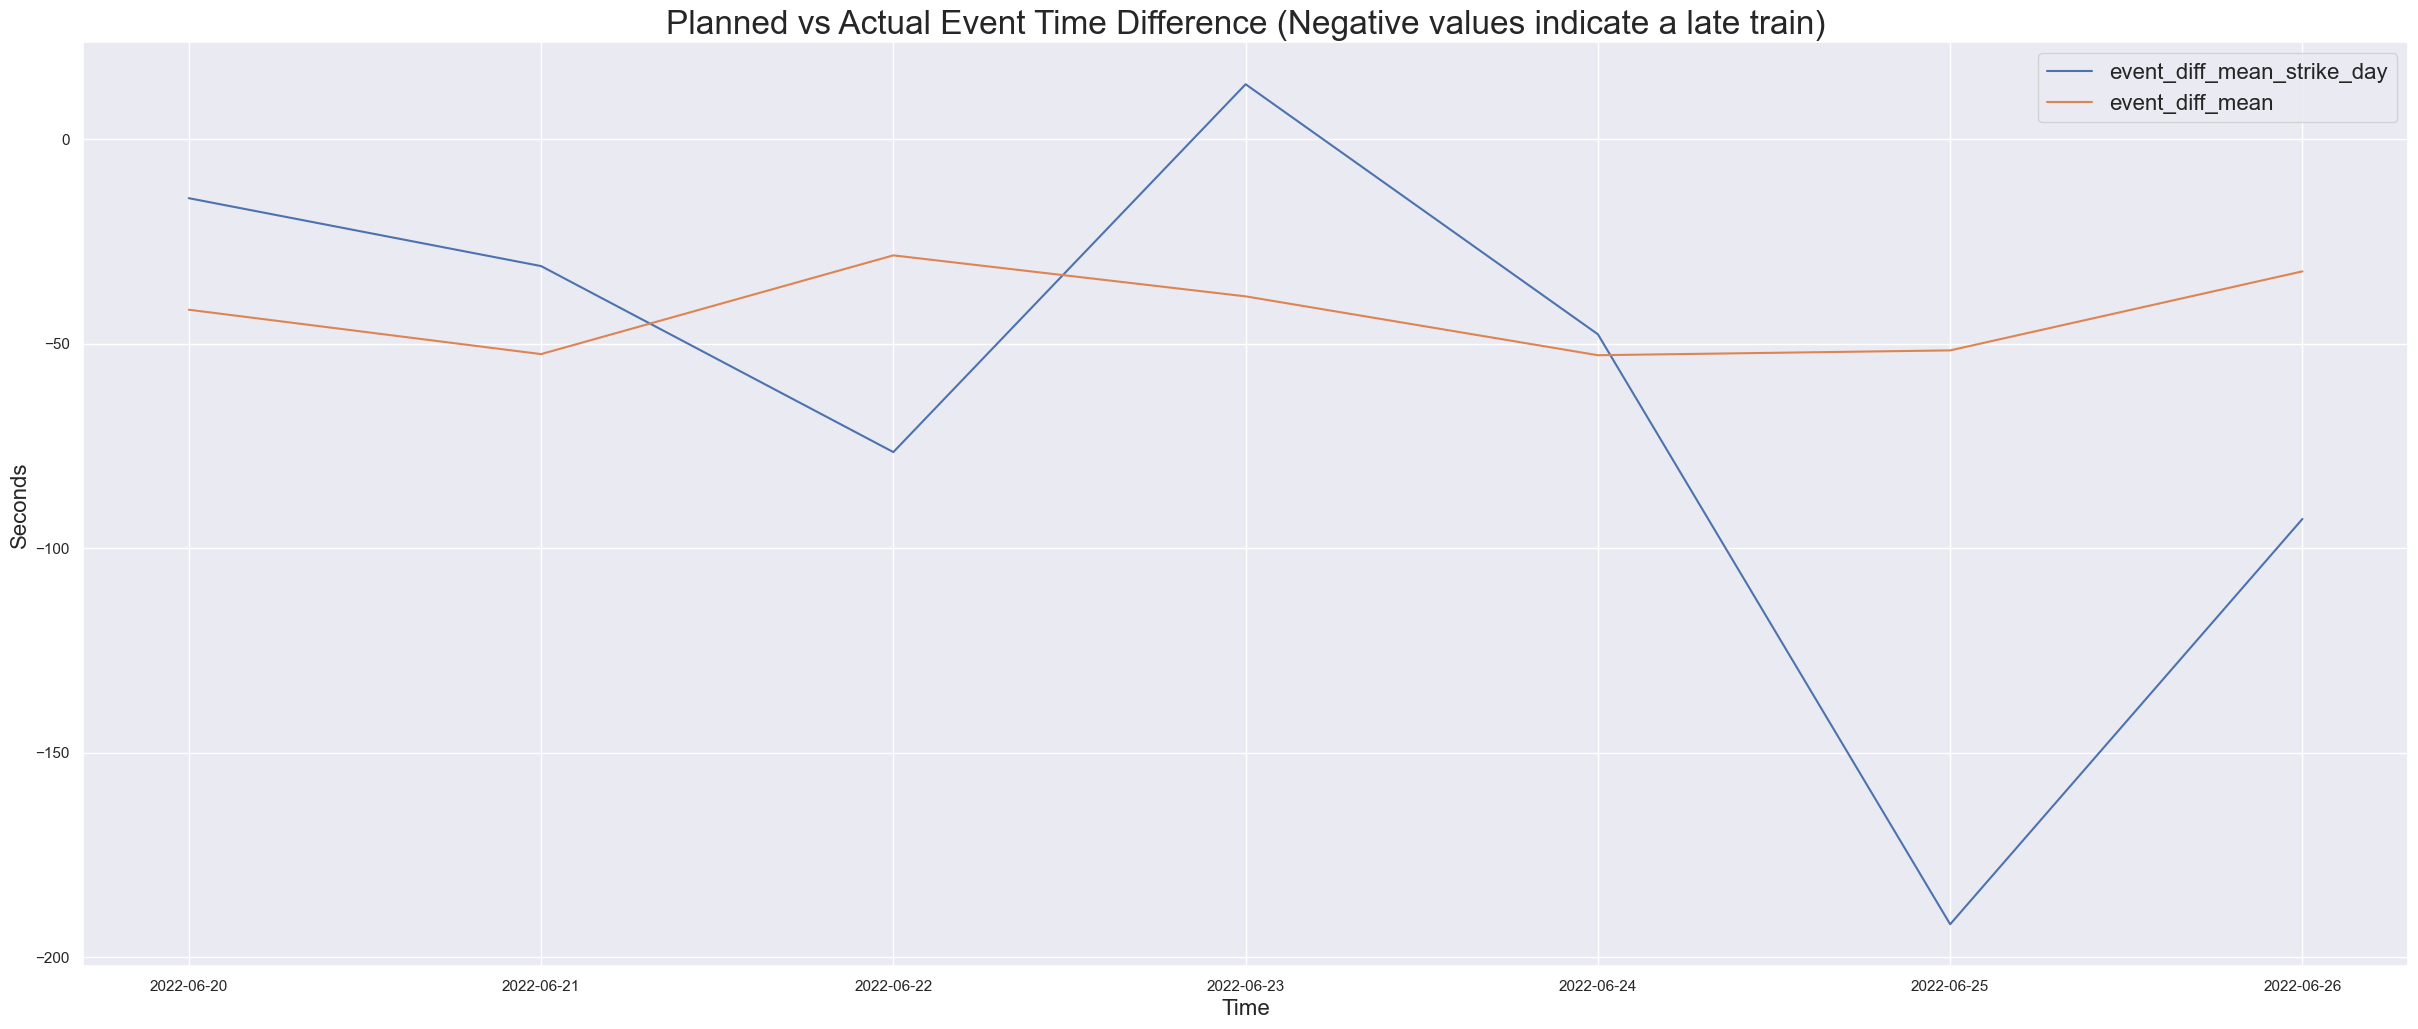

In [9]:
ax = plot_series_double(df=strike_event_count_daily, column1='event_diff_mean_strike_day', column2='event_diff_mean', ylabel='Seconds',
                 title='Planned vs Actual Event Time Difference (Negative values indicate a late train)', end=24*7*2, )

plt.show()

On average, actual events are delayed by around 30-50 seconds.  
We can see that on the strike days, there was high variance. It seems that appropriate sceduling was made on the 21st and 23rd, but not on the 25th where the average delay was about 3 minutes.

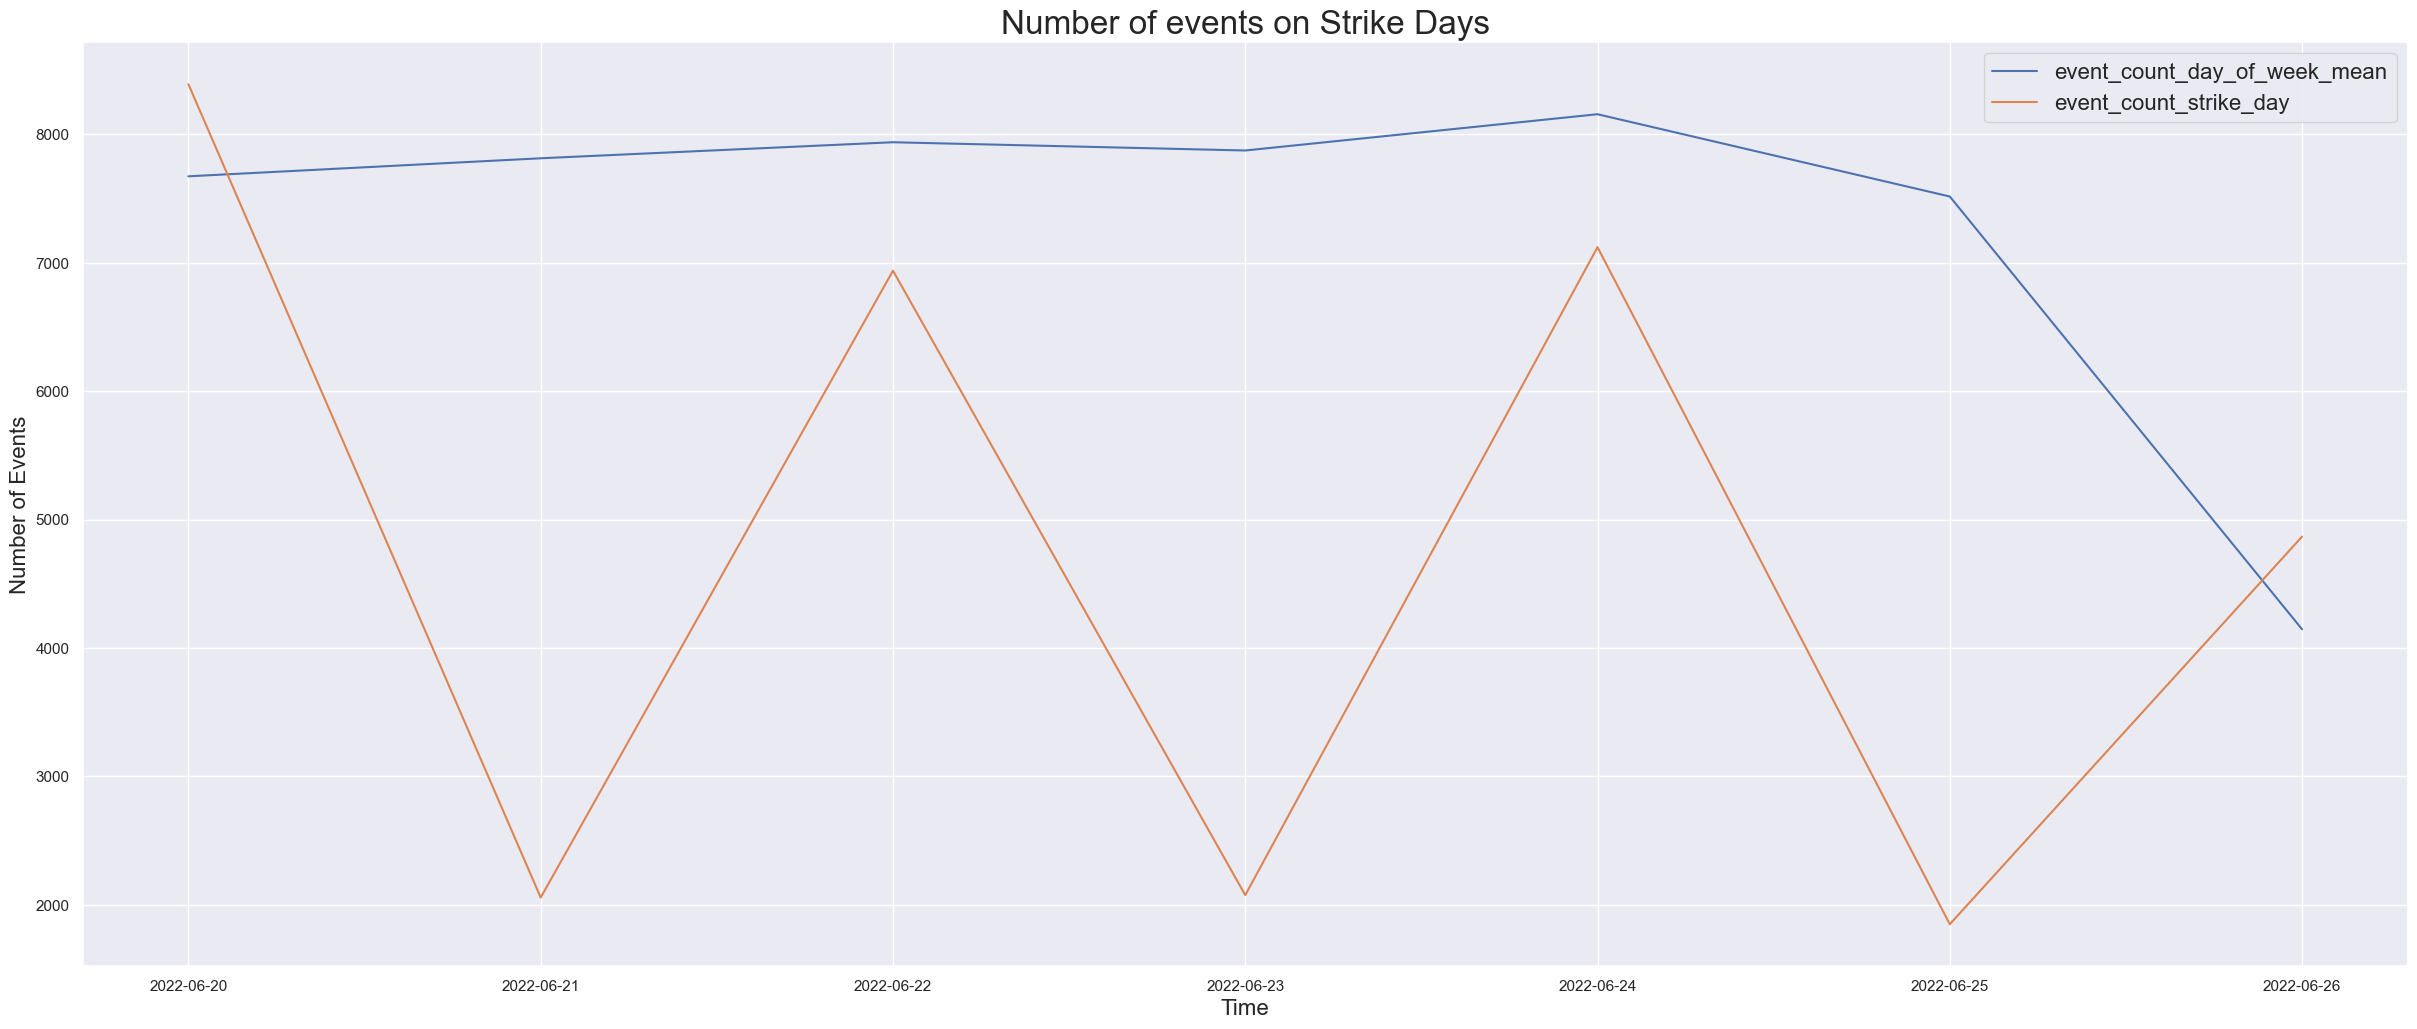

In [10]:
ax = plot_series_double(df=strike_event_count_daily, column1='event_count_day_of_week_mean', column2='event_count_strike_day', ylabel='Number of Events',
                 title='Number of events on Strike Days', end=24*7*2, )

plt.show()

The affect of the strike is obvious here, with the number of events being much lower than the weekly average on strike days.